In [1]:
import pandas as pd
import numpy as np

In [54]:
# 데이터프레임 로딩
df = pd.read_csv('example_dataframe.csv')

In [5]:
# 데이터프레임 확인
df.tail()

,loan_status,loan_amnt,term,int_rate,grade,annual_inc
1995,0,8000,36,11.58,2,30992.0
1996,1,6700,36,14.11,4,42050.0
1997,1,3000,36,9.63,1,30500.0
1998,1,6000,36,9.63,1,62000.0
1999,1,2500,36,11.58,2,95800.0


In [6]:
# 특정열의 마지막 부분만 확인
df["grade"].tail()

1995    2
1996    4
1997    1
1998    1
1999    2
Name: grade, dtype: int64

In [7]:
# 데이터프레임 행 번호 지정하여 확인
df.ix[1000:1005]

,loan_status,loan_amnt,term,int_rate,grade,annual_inc
1000,0,7500,36,12.61,4,80004.0
1001,1,7500,36,10.71,2,79992.0
1002,1,3200,36,7.37,1,45240.0
1003,1,7000,36,8.00,1,44500.0
1004,1,6600,36,11.97,3,54000.0
1005,0,5050,36,12.29,3,62000.0


In [8]:
# 'loan_status' 변수의 원소별 개수 확인
pd.value_counts(df["loan_status"])

1    1689
0     311
Name: loan_status, dtype: int64

In [10]:
# 'grade' 변수의 원소 종류 확인
np.unique(df['grade'])

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [11]:
# unique는 중복값을 무시하고 유일한 값만을 반환
a = [1, 1, 1, 2, 3, 4, 4]
np.unique(a)

array([1, 2, 3, 4])

In [12]:
# 지정 행이나 열의 합(axis = 0: 열의 합, 1: 행의 합, default: axis = 0)
df.ix[0:5].sum(axis=1)

0     29555.75
1     23550.28
2    130795.43
3     45045.43
4     21251.54
5     72300.59
dtype: float64

In [13]:
# sum() method에 인자가 없으므로 default값인 axis = 0 적용
df["loan_amnt"].sum()

18312075

In [14]:
# 변수별 합계 행 생성 및 확인
df.ix["Total"] = df.sum()
df.tail()

,loan_status,loan_amnt,term,int_rate,grade,annual_inc
1996,1.0,6700.0,36.0,14.11,4.0,4.205000e+04
1997,1.0,3000.0,36.0,9.63,1.0,3.050000e+04
1998,1.0,6000.0,36.0,9.63,1.0,6.200000e+04
1999,1.0,2500.0,36.0,11.58,2.0,9.580000e+04
Total,1689.0,18312075.0,72000.0,22298.85,5186.0,1.324444e+08


In [17]:
# 조건부 원소(성분, 값) 변경
# 비어있는 열 'test' 생성 테스트
df.ix[df.grade == 1.0, 'test'] = "A"
df.tail()

,loan_status,loan_amnt,term,int_rate,grade,annual_inc,test
1996,1.0,6700.0,36.0,14.11,4,4.205000e+04,NaN
1997,1.0,3000.0,36.0,9.63,A,3.050000e+04,NaN
1998,1.0,6000.0,36.0,9.63,A,6.200000e+04,NaN
1999,1.0,2500.0,36.0,11.58,2,9.580000e+04,NaN
Total,1689.0,18312075.0,72000.0,22298.85,5186,1.324444e+08,NaN


In [19]:
# 변수 내 비어있는 셀 개수 확인
df.isnull().sum()

loan_status       0
loan_amnt         0
term              0
int_rate          0
grade             0
annual_inc        0
test           2001
dtype: int64

In [20]:
# 변수별 성분속성 확인
df.dtypes

loan_status    float64
loan_amnt      float64
term           float64
int_rate       float64
grade           object
annual_inc     float64
test           float64
dtype: object

자주 등장하는 types
- float(실수), int(정수): 숫자
- string: 문자
- object: 숫자+문자

ex) 숫자나 문자로만 인코딩된 변수가 object 타입이라면 noise가 섞여있을 가능성 높음.  
details: https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html

In [22]:
# 'grade' 변수를 'loan_status' 변수의 값에 따라 성분 개수 세기
df.grade.groupby(df.loan_status).value_counts()

loan_status  grade 
0.0          3.0        95
             2.0        87
             4.0        75
             A          22
             5.0        18
             6.0        12
             7.0         2
1.0          2.0       525
             3.0       465
             A         378
             4.0       221
             5.0        80
             6.0        18
             7.0         2
1689.0       5186.0      1
Name: grade, dtype: int64

In [33]:
# 'loan_amnt' 변수에 기술통계 실행
df["loan_amnt"].describe()

count    2.001000e+03
mean     1.830292e+04
std      4.092038e+05
min      5.000000e+02
25%      5.000000e+03
50%      7.500000e+03
75%      1.200000e+04
max      1.831208e+07
Name: loan_amnt, dtype: float64

- count: 성분 개수
- mean: 평균
- std: standard deviation, 표준편차
- min: minimum, 최소값
- 25%: 1 사분위수, 데이터의 순서에서 25% 지점에 위치한 값
- 50%: 2 사분위수, 데이터의 순서에서 50% 지점에 위치한 값, 중앙값과 동일
- 75%: 3 사분위수, 데이터의 순서에서 75% 지점에 위치한 값
- max: maximum, 최대값

사분위수 참조: http://support.minitab.com/ko-kr/minitab/17/topic-library/basic-statistics-and-graphs/graphs/graphs-that-compare-groups/boxplots/quartiles/

In [62]:
import matplotlib as mpl    # 기본 matplotlib 라이브러리
import matplotlib.pylab as plt    # pyplot과 다르게 계산식이 포함된 수식 및 변수 표현에 유리
import seaborn as sns    # matplotlib을 override하는 시각화 디자인 향상 툴
sns.set(palette="husl", font_scale=2)    # 색상 및 글자크기 설정

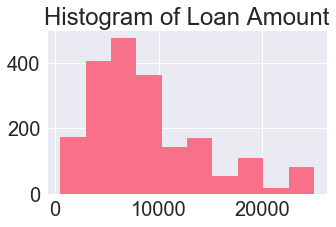

In [63]:
plt.figure(figsize=(5, 3))    # plot 크기 설정
plt.hist(df["loan_amnt"], bins=10)    # 'loan_amnt' 변수에 대한 히스토그램, 구간 = 10
plt.title("Histogram of Loan Amount")    # 히스토그램 제목 설정
plt.show()    # 히스토그램 출력